# Assignment 3 

#### Importing Necessary Libraries


In [1]:
%autosave 120
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

Autosaving every 120 seconds


#### Importing Data Into Dataframes

In [3]:
factors_data = pd.read_csv("Risk_Factors.csv")
market_data = pd.read_csv("Market_Portfolio.csv")
industry_data  = pd.read_csv("Industry_Portfolios.csv")


FileNotFoundError: [Errno 2] File Risk_Factors.csv does not exist: 'Risk_Factors.csv'

#### Checking For Null Values and Datatypes Within The Columns

In [ ]:
print(industry_data.isnull().sum(),market_data.isnull().sum(),factors_data.isnull().sum())

#### Checking For Datatypes Within The Columns

In [442]:
print(industry_data.dtypes, market_data.dtypes, factors_data.dtypes)

Date       int64
NoDur    float64
Durbl    float64
Manuf    float64
Enrgy    float64
HiTec    float64
Telcm    float64
Shops    float64
Hlth     float64
Utils    float64
Other    float64
dtype: object Date        int64
Market    float64
dtype: object Date       int64
Rf       float64
Rm-Rf    float64
SMB      float64
HML      float64
dtype: object


#### Changing Date Column To Datetime Format

In [443]:
industry_data["Date"] = pd.to_datetime(industry_data["Date"], format = "%Y%m")
market_data["Date"] = pd.to_datetime(market_data["Date"], format = "%Y%m")
factors_data["Date"] = pd.to_datetime(factors_data["Date"], format = "%Y%m")

#### Checking Lengths Of Dataframes

In [444]:
len(industry_data), len(market_data), len(factors_data)

(120, 120, 120)

#### Combining All Dataframes

In [445]:
combined = pd.merge((pd.merge(industry_data,market_data, on = "Date")), factors_data, on = "Date")

In [446]:
combined.head()

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market,Rf,Rm-Rf,SMB,HML
0,2004-01-01,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22,0.07,2.15,2.67,1.55
1,2004-02-01,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46,0.06,1.40,-1.17,0.45
2,2004-03-01,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23,0.09,-1.32,1.84,0.07
3,2004-04-01,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75,0.08,-1.83,-2.59,-1.67
4,2004-05-01,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23,0.06,1.17,-0.10,-0.33


---
# Part A
---

#### Sharpe Ratio

In [447]:
new_list = []
i = 1
while i < 11:
    numerator = np.mean(combined.iloc[:, i]-combined["Rf"])
    denominator = np.std(combined.iloc[:,i] - combined["Rf"])
    sharpe = numerator/denominator
    new_list.append(sharpe)
    i +=1
    

In [448]:
Sharpe_Ratio = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["Sharpe Ratio"])
Sharpe_Ratio

,Sharpe Ratio
NoDur,0.232068
Durbl,0.072659
Manuf,0.167315
Enrgy,0.182470
HiTec,0.119050
Telcm,0.169773
Shops,0.192557
Hlth,0.173253
Utils,0.211832
Other,0.064964


#### Sortini Ratio

In [449]:
new_list = []
i = 1
while i < 11:
    numerator = np.mean(combined.iloc[:,i] - combined["Rf"])
    placeholder = combined.iloc[:,i] - combined["Rf"]
    denominator = placeholder[placeholder<0].std(ddof=0)
    sortini = numerator/denominator
    new_list.append(sortini)
    i +=1

In [450]:
Sortini_Ratio = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["Sortini Ratio"])
Sortini_Ratio

,Sortini Ratio
NoDur,0.296957
Durbl,0.104115
Manuf,0.201102
Enrgy,0.250320
HiTec,0.170323
Telcm,0.222328
Shops,0.264294
Hlth,0.271549
Utils,0.232547
Other,0.077476


#### Treynor Ratio

In [451]:
new_list = []
i = 1
while i < 11:
    numerator = np.mean(combined.iloc[:,i] - combined["Rf"])
    beta = (combined.iloc[:,i].cov(combined.Market))/combined["Market"].var()
    treynor = numerator/beta
    new_list.append(treynor)
    i +=1

In [452]:
Treynor_Ratio = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["Treynor Ratio"])
Treynor_Ratio

,Treynor Ratio
NoDur,1.188365
Durbl,0.367650
Manuf,0.757008
Enrgy,1.138234
HiTec,0.564005
Telcm,0.837285
Shops,0.954738
Hlth,0.975555
Utils,1.449427
Other,0.299702


#### Jensen's Alpha

In [453]:
new_list = []
i = 1
while i < 11:
    part1 = np.mean(combined.iloc[:,i] - combined["Rf"])
    beta = (combined.iloc[:,i].cov(combined.Market))/combined["Market"].var()
    part2 = np.mean(combined["Rm-Rf"])
    jensen = part1 -beta*part2
    new_list.append(jensen)
    i +=1

In [454]:
Jensens_Alpha = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["Jensen's Alpha"])
Jensens_Alpha

,Jensen's Alpha
NoDur,0.370398
Durbl,-0.417383
Manuf,0.159304
Enrgy,0.501801
HiTec,-0.064385
Telcm,0.194964
Shops,0.275969
Hlth,0.238740
Utils,0.445855
Other,-0.387705


#### 3 Factor Alpha

In [455]:
new_list = []
placeholder3 = combined["Rm-Rf"]
placeholder4 = combined["SMB"]
placeholder5 = combined["HML"]
i = 1
while i< 11:
    placeholder2 = combined.iloc[:,i] - combined["Rf"]
    model = sm.formula.ols(formula = "placeholder2 ~ placeholder3+placeholder4+placeholder5", data = combined).fit()
    new_list.append(model.params[0])
    i +=1

In [456]:
three_FA = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["3FA alpha"])
three_FA

,3FA alpha
NoDur,0.386704
Durbl,-0.474342
Manuf,0.153285
Enrgy,0.523007
HiTec,-0.065979
Telcm,0.200724
Shops,0.255941
Hlth,0.257472
Utils,0.474411
Other,-0.404412


In [457]:
#array1 = [Sharpe_Ratio, Sortini_Ratio, Treynor_Ratio, Jensens_Alpha, three_FA]
df1 = pd.merge(Sharpe_Ratio, Sortini_Ratio, left_index = True, right_index = True)
df2 = pd.merge(df1, Treynor_Ratio, left_index = True, right_index = True)
df3 = pd.merge(df2, Jensens_Alpha, left_index = True, right_index = True)
df_ratios = pd.merge(df3, three_FA, left_index = True, right_index = True)

In [458]:
df_ratios.reset_index(level= 0, inplace = True)
df_ratios = df_ratios.rename(columns={"index": "Industry"})
df_ratios

,Industry,Sharpe Ratio,Sortini Ratio,Treynor Ratio,Jensen's Alpha,3FA alpha
0,NoDur,0.232068,0.296957,1.188365,0.370398,0.386704
1,Durbl,0.072659,0.104115,0.367650,-0.417383,-0.474342
2,Manuf,0.167315,0.201102,0.757008,0.159304,0.153285
3,Enrgy,0.182470,0.250320,1.138234,0.501801,0.523007
4,HiTec,0.119050,0.170323,0.564005,-0.064385,-0.065979
5,Telcm,0.169773,0.222328,0.837285,0.194964,0.200724
6,Shops,0.192557,0.264294,0.954738,0.275969,0.255941
7,Hlth,0.173253,0.271549,0.975555,0.238740,0.257472
8,Utils,0.211832,0.232547,1.449427,0.445855,0.474411
9,Other,0.064964,0.077476,0.299702,-0.387705,-0.404412


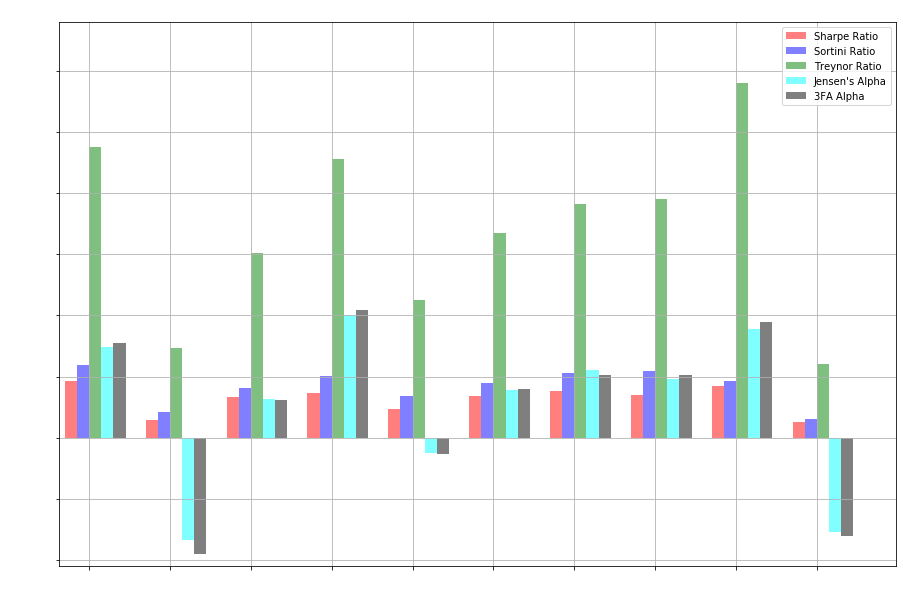

In [459]:
pos = list(range(len(df_ratios["Industry"])))
width = 0.15

fig, ax = plt.subplots(figsize = (15,10))
plt.bar(pos, df_ratios["Sharpe Ratio"], width, alpha = 0.5, color = "red", label = "Sharpe Ratio")
plt.bar([p+width for p in pos], df_ratios["Sortini Ratio"], width, alpha = 0.5, color = "blue", label = "Sortini Ratio")
plt.bar([p+width*2 for p in pos], df_ratios["Treynor Ratio"], width, alpha = 0.5, color = "green", label = "Treynor Ratio")
plt.bar([p+width*3 for p in pos], df_ratios["Jensen's Alpha"], width, alpha = 0.5, color = "cyan", label = "Jensen's Alpha")
plt.bar([p+width*4 for p in pos], df_ratios["3FA alpha"], width, alpha = 0.5, color = "black", label = "3FA Alpha")

ax.set_ylabel('Number', color = "white")

# Set the chart's title
ax.set_title('Bar Plot Of Ratios', color = "white")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 *width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_ratios['Industry'], color = "white")
plt.yticks(color = "white")
# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*8)
plt.ylim(min(df_ratios["3FA alpha"]-0.05),max(df_ratios['Treynor Ratio'])+0.25)
# Adding the legend and showing the plot
plt.legend()
plt.grid()
plt.show()





#### Economic Signficance

----
# Part B
----

#### Finding Mean Returns From Industry Dataframe

In [460]:
mean_returns = industry_data.mean()
mean_returns_array = np.array(mean_returns)
mean_returns_array.transpose()

array([0.90283333, 0.73333333, 1.01283333, 1.23116667, 0.76625   ,
       0.88141667, 0.91633333, 0.78383333, 0.90716667, 0.48908333])

#### Finding Covariance Matrix From Industry Dataframe

In [461]:
cov_matrix = industry_data.cov()
cov_matrix

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


#### Creating Loop To Get 10 Random Numbers between 1 And 0 For 10,000 Times And Append To A List

In [462]:
x = range(0,10000)

weights = []

for i in x:
    a = np.random.uniform(1,0,10)
    a = a/sum(a)
    weights.append(a)


#### Convert List To An Array

In [463]:
weights = np.array(weights)

In [464]:
weights

array([[0.16993348, 0.03931422, 0.09587157, ..., 0.15577728, 0.09987126,
        0.06586552],
       [0.05871503, 0.06898582, 0.06928359, ..., 0.01210468, 0.25485588,
        0.2502284 ],
       [0.01167553, 0.09765955, 0.02814474, ..., 0.11357699, 0.1246828 ,
        0.07543024],
       ...,
       [0.08374775, 0.09454238, 0.1133872 , ..., 0.07948813, 0.14269944,
        0.08519618],
       [0.02998382, 0.10370536, 0.24920963, ..., 0.12343442, 0.03214187,
        0.12785019],
       [0.04231835, 0.11361869, 0.16366983, ..., 0.15027595, 0.12351786,
        0.12369397]])

#### Create A Loop To Calculate Expected Return For Each Industry Using Formula In Notes

In [465]:
expected_return_list = []
for i in range(10000):
    expected_return = weights[i].dot(mean_returns_array.transpose())
    #mean_returns_array.transpose().dot(list1[i])
    expected_return_list.append(expected_return)
    
expected_return_array = np.array(expected_return_list)

In [466]:
expected_return_list

[0.8513594614162004,
 0.7952949791067436,
 0.8752010002973432,
 0.8270823436138313,
 0.9242405389238288,
 0.857367265994884,
 0.8186400362364789,
 0.7996271979044998,
 0.8695092951870536,
 0.8299703195252016,
 0.8374014844912422,
 0.855637411473821,
 0.7998758565786087,
 0.8659151499464595,
 0.818287322045681,
 0.8613702577945317,
 0.867126388808068,
 0.9013844090828556,
 0.9086089864996476,
 0.8887653169023848,
 0.9374192887010975,
 0.8277170356702793,
 0.8358343733940957,
 0.796461134548441,
 0.8217934959887452,
 0.7772151368111441,
 0.9191862500725236,
 0.9016284830959308,
 0.8792269729881297,
 0.8653643086341483,
 0.914521256599331,
 0.8777578541375034,
 0.892937036081125,
 0.8867736903308501,
 0.8569627860777462,
 0.9194044946843148,
 0.8949999221502629,
 0.8910165180012397,
 0.8996747319327694,
 0.8378804041885506,
 0.852677880326896,
 0.8848029010628842,
 0.861435180017786,
 0.8659884077833165,
 0.8659018334953812,
 0.8440081926460445,
 0.8223631530700442,
 0.8850060812848086,
 

#### Create A Loop To Calculate Variance For Each Industry Using Formula In Notes

In [467]:
len(weights)

10000

In [468]:
variance_list = []
for i in range(len(weights)):
    variance_value = weights[i].transpose()@(cov_matrix)@(weights[i])
    variance_list.append(variance_value)

variance_list

[15.393906620825542,
 16.908391202489355,
 18.276790877884515,
 19.96492766030982,
 15.80178393239169,
 17.504261137838483,
 21.62020088556749,
 18.73294470512232,
 19.706477968309763,
 15.726605292559743,
 19.340768019434517,
 20.207506858337844,
 16.478555403909837,
 19.18932597780948,
 18.470605445537245,
 16.83647065925365,
 19.452796901066492,
 17.93365620881395,
 23.30257783630453,
 20.284097830986717,
 16.917971581068016,
 20.77681365829658,
 17.83195255251031,
 22.168986446652326,
 18.16182247194213,
 16.57758565321488,
 18.500113555773087,
 14.89945951565269,
 18.06934743606955,
 22.772412427340136,
 17.125531583555386,
 16.018249680533884,
 23.513402799663005,
 18.33676394081928,
 20.490689651918913,
 13.367530247176951,
 19.578516778012528,
 15.965834725221152,
 17.211156957290434,
 16.269405467011843,
 20.565695333530236,
 19.972121365556582,
 17.95537151406192,
 19.38796785800213,
 16.952982534552632,
 19.52036571321238,
 18.14670856353511,
 16.506631587901783,
 20.9434779

#### Convert List Into Array And Find Standard Deviation

In [469]:
variance_array = np.array(variance_list)
std_array = (variance_array)**0.5
variance_array = variance_array.reshape(10000,1)
std_array = std_array.reshape(10000,1)

In [470]:
variance_array.shape, std_array.shape

((10000, 1), (10000, 1))

#### Plot Scatter Plot Of Data

Text(0.5, 1.0, 'Standard Deviation Of Returns Versus Expected Returns')

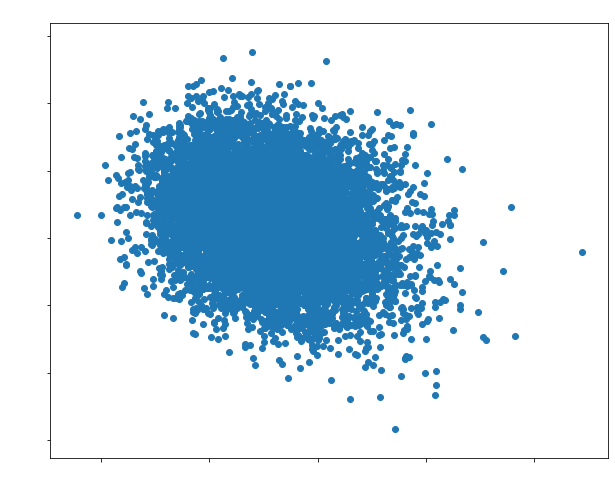

In [471]:
plt.figure(figsize=(10,8))
plt.scatter(std_array, expected_return_array)
plt.xlabel("Standard Deviation Of Returns", color = "white")
plt.ylabel("Expected Returns", color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.title("Standard Deviation Of Returns Versus Expected Returns", color = "white")

In [472]:
a = np.random.uniform(1,0,10)
a = 1/a
a

array([2.40502749, 1.03817529, 1.20804209, 1.36225842, 1.35635344,
       3.70891759, 2.15910172, 1.41733842, 1.72119353, 1.80094473])

In [473]:
x = range(0,10000)

weights = []

for i in x:
    a = np.random.uniform(1,0,10)
    a = 1/a
    a = a/sum(a) 
    weights.append(a)
    
weights = np.array(weights)


In [474]:
expected_return_list = []
for i in range(10000):
    expected_return = weights[i].dot(mean_returns_array.transpose())
    #mean_returns_array.transpose().dot(list1[i])
    expected_return_list.append(expected_return)
    
expected_return_array = np.array(expected_return_list)

In [475]:
variance_list = []
for i in range(len(weights)):
    variance_value = weights[i].transpose()@(cov_matrix)@(weights[i])
    variance_list.append(variance_value)

variance_list

[18.80388014662553,
 14.693781800116874,
 14.023731632892755,
 19.239091573025668,
 13.428432218890118,
 24.444835227729143,
 18.68790541282852,
 12.761605282705323,
 17.328518042430144,
 30.078832126566613,
 15.731457166047893,
 14.627151761325205,
 26.199523203080176,
 19.34560094195978,
 13.282853872195027,
 22.052735658965858,
 52.27569586742149,
 16.923203397914687,
 22.633457461278116,
 21.427424963400153,
 15.108005332391677,
 18.360361648216355,
 25.56037097406578,
 20.083493359309912,
 17.424968133895234,
 19.884362868419124,
 19.615424044281156,
 28.009617143172232,
 12.728327618262952,
 22.485652821375858,
 15.651962764907012,
 19.504382507877004,
 15.706472959176743,
 26.06736930172694,
 14.640494524424213,
 14.293282024827683,
 17.47994977399898,
 18.699031438633675,
 20.042221286624155,
 17.01769680118977,
 17.570187732586184,
 17.365637499997305,
 16.747236914163405,
 16.21084213321329,
 18.758397206613946,
 18.300683366644197,
 20.591947623783412,
 16.64528625292447,
 1

In [476]:
variance_array = np.array(variance_list)
std_array = (variance_array)**0.5
variance_array = variance_array.reshape(10000,1)
std_array = std_array.reshape(10000,1)

Text(0.5, 1.0, 'Standard Deviation Of Returns Versus Expected Returns')

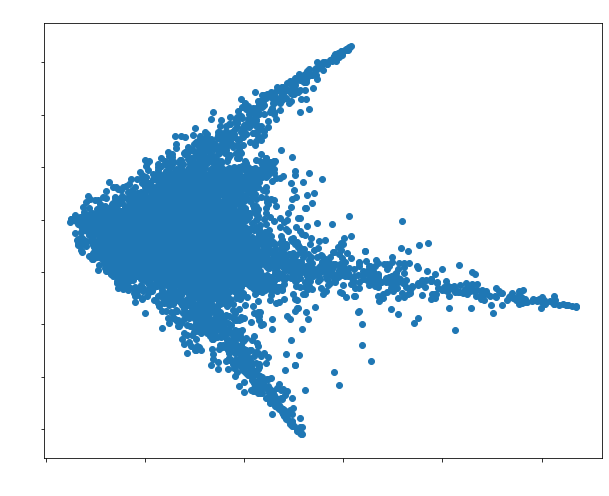

In [477]:
plt.figure(figsize=(10,8))
plt.scatter(std_array, expected_return_array)
plt.xlabel("Standard Deviation Of Returns", color = "white")
plt.ylabel("Expected Returns", color = "white")
#plt.xlim(0, 10000)
#plt.ylim()
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.title("Standard Deviation Of Returns Versus Expected Returns", color = "white")